In [1]:
import pandas as pd
import numpy as np
import random
import string
# Pour le nettoyage (nous en aurons besoin plus tard)
import re
# Pour la visualisation (pour l'EDA)
import matplotlib.pyplot as plt
import seaborn as sns

def generate_bec_email_bilingual(num=100):
    data = []
    
    # Scénarios en Français
    scenarios_fr = [
        ("Urgent: Virement Confidentiel", "Je suis le CEO, faites ce virement de 5.000.000 XAF immédiatement. Ne pas en discuter.", "fr"),
        ("Modification de Facture", "Veuillez mettre à jour le RIB du fournisseur XYZ, cette nouvelle facture est jointe.", "fr"),
    ]
    
    # Scénarios en Anglais (BEC standard)
    scenarios_en = [
        ("Urgent Wire Transfer", "I am the CEO, complete this $5,000 wire transfer immediately to the new vendor. Keep it confidential.", "en"),
        ("Invoice Update", "Please update supplier XYZ's bank details, this new invoice is attached. The old one is invalid.", "en"),
    ]
    
    all_scenarios = scenarios_fr + scenarios_en
    spoofed_domains = ['compagniez.com', 'compagnie-xyz.com', 'compagniexyz.co']
    
    for i in range(num):
        scenario, body, lang = random.choice(all_scenarios)
        
        # Simulation du temps d'envoi (heures anormales)
        hour = random.choice([2, 3, 4, 21, 22, 23])
        
        data.append({
            'sender_domain': random.choice(spoofed_domains),
            'sender_role': random.choice(['CEO', 'CFO', 'Legal Counsel']),
            'send_time': f'{hour:02}:00:00',
            'subject': scenario,
            'body': body,
            'language': lang, # Nouvelle colonne pour suivre la langue
            'has_attachment': 1 if 'Facture' in scenario or 'Invoice' in scenario else 0,
            'label': 1
        })
        
    return pd.DataFrame(data)

# Générons 200 e-mails BEC bilingues (100 français, 100 anglais approximatifs)
df_bec = generate_bec_email_bilingual(200)

# Modification de la fonction Légitime pour inclure aussi l'anglais
def generate_legit_email_bilingual(num=2000):
    data = []
    
    scenarios_fr = [("Rapport Mensuel", "Veuillez trouver ci-joint le rapport de performance."), ("Réunion Équipe", "Rappel : la réunion aura lieu demain.")]
    scenarios_en = [("Monthly Report", "Please find the performance report attached."), ("Team Meeting", "Reminder: the team meeting is tomorrow morning.")]
    
    all_scenarios = [(s[0], s[1], "fr") for s in scenarios_fr] + [(s[0], s[1], "en") for s in scenarios_en]

    for i in range(num):
        scenario, body, lang = random.choice(all_scenarios)
        hour = random.randint(8, 17)
        
        data.append({
            'sender_domain': 'compagniexyz.com',
            'sender_role': random.choice(['Employé', 'Manager', 'RH']),
            'send_time': f'{hour:02}:{random.randint(0, 59):02}:00',
            'subject': scenario,
            'body': body,
            'language': lang,
            'has_attachment': 1 if 'Rapport' in scenario or 'Report' in scenario else 0,
            'label': 0
        })
        
    return pd.DataFrame(data)

# Générons 2000 e-mails Légitimes bilingues
df_legit = generate_legit_email_bilingual(2000)


# Recombinaison finale
df_final = pd.concat([df_bec, df_legit], ignore_index=True)
df_final = df_final.sample(frac=1).reset_index(drop=True)
df_final.to_csv('simulated_email_data_bilingual.csv', index=False)
print(df_final['language'].value_counts())
print(f"Nouvelle Proportion BEC : {df_final['label'].mean():.4f}")






df_final.to_csv('simulated_email_data.csv', index=False)


language
en    1101
fr    1099
Name: count, dtype: int64
Nouvelle Proportion BEC : 0.0909


C:\Users\jjk\AppData\Local\Temp\ipykernel_13560\1174685510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_final, palette='viridis')


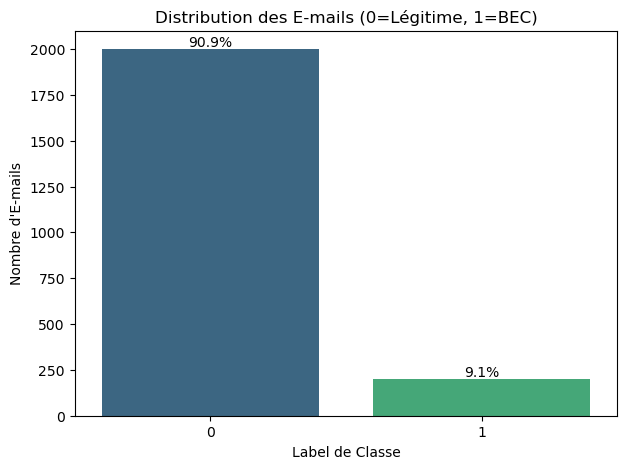

In [2]:
# Tâche 1 : Visualisation du Déséquilibre
plt.figure(figsize=(7, 5))
sns.countplot(x='label', data=df_final, palette='viridis')
plt.title("Distribution des E-mails (0=Légitime, 1=BEC)")
plt.xlabel("Label de Classe")
plt.ylabel("Nombre d'E-mails")

# Ajout des pourcentages pour la clarté
total = len(df_final)
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.gca().text(x, y, percentage, ha='center', va='bottom')

plt.show()

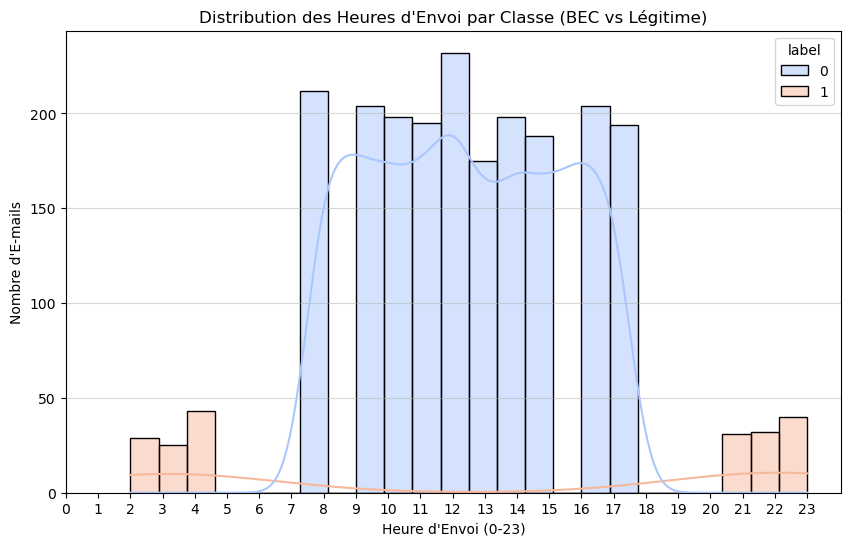

In [3]:
# Tâche 2 : Corrélation entre l'Heure d'Envoi et le Label
# Conversion de l'heure en format numérique (pour l'analyse)
df_final['hour'] = df_final['send_time'].apply(lambda x: int(x.split(':')[0]))

plt.figure(figsize=(10, 6))
# Visualisation de la distribution des heures pour chaque label
sns.histplot(data=df_final, x='hour', hue='label', bins=24, kde=True, palette='coolwarm')
plt.title("Distribution des Heures d'Envoi par Classe (BEC vs Légitime)")
plt.xlabel("Heure d'Envoi (0-23)")
plt.ylabel("Nombre d'E-mails")
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.5)
plt.show()

C:\Users\jjk\AppData\Local\Temp\ipykernel_13560\1474307282.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='body_length', data=df_final, palette='Set3')


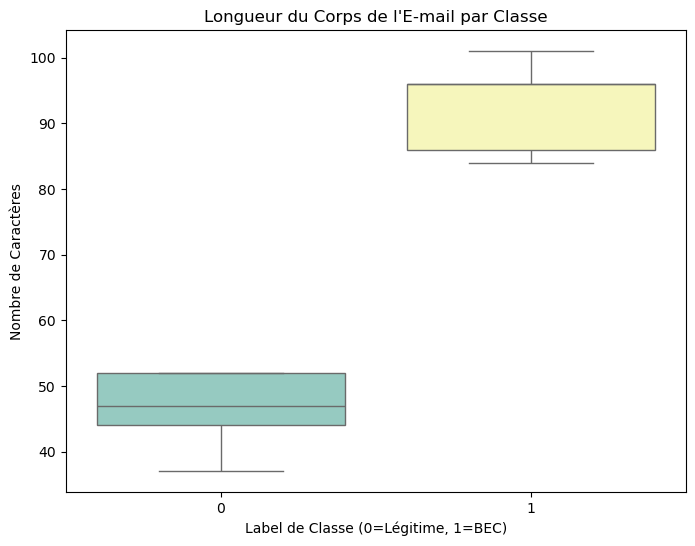

In [4]:
# Tâche 3 : Corrélation avec la Longueur du Corps de l'E-mail
df_final['body_length'] = df_final['body'].apply(len)

plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='body_length', data=df_final, palette='Set3')
plt.title("Longueur du Corps de l'E-mail par Classe")
plt.xlabel("Label de Classe (0=Légitime, 1=BEC)")
plt.ylabel("Nombre de Caractères")
plt.show()